In [25]:

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [1]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_3b205d99c3934ac4fc5b44445d55858302b73bb1','domain': {'id': '7798bf9ad6564a1583f1f2af8c2a92de'},
            'password': 'MD5({70Mx*{3L[^a'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c('LendingClubDataSet', 'LoanStats3a_securev1.csv'),skiprows=1)



/usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_data_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
lendingclubdf=df_data_1
lendingclubdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [5]:
lendingclubdf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=115)

In [6]:

# .ix[row slice, column slice] 
lendingclubdf.ix[:4,:7]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%


In [7]:
lendingclubdf.drop(['id','member_id'],1, inplace=True)


In [8]:
lendingclubdf.loan_amnt = pd.Series(lendingclubdf.loan_amnt).astype(float)
lendingclubdf.funded_amnt = pd.Series(lendingclubdf.funded_amnt).astype(float)

In [9]:

lendingclubdf.int_rate = pd.Series(lendingclubdf.int_rate).str.replace('%', '').astype(float)

In [13]:
lendingclubdf.funded_amnt.unique

<bound method IndexOpsMixin.unique of 0         5000.0
1         2500.0
2         2400.0
3        10000.0
4         3000.0
5         5000.0
6         7000.0
7         3000.0
8         5600.0
9         5375.0
10        6500.0
11       12000.0
12        9000.0
13        3000.0
14       10000.0
15        1000.0
16       10000.0
17        3600.0
18        6000.0
19        9200.0
20       20250.0
21       21000.0
22       10000.0
23       10000.0
24        6000.0
25       15000.0
26       15000.0
27        5000.0
28        4000.0
29        8500.0
          ...   
42508     6000.0
42509     5350.0
42510     1900.0
42511    10000.0
42512     2000.0
42513     6000.0
42514     4400.0
42515     1200.0
42516     5000.0
42517     1400.0
42518     1000.0
42519     5000.0
42520     2500.0
42521     3000.0
42522     2600.0
42523     1000.0
42524     6450.0
42525     1275.0
42526    10500.0
42527     3000.0
42528     3000.0
42529     2000.0
42530     6500.0
42531     3500.0
42532     1000.0
42533     

In [14]:
# print (lendingclubdf.loan_amnt != lendingclubdf.funded_amnt).value_counts()

In [16]:

lendingclubdf.ix[:5,8:15]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid
1,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off
2,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid
3,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid
4,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid
5,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid


In [19]:
print (lendingclubdf.emp_title.value_counts().head())
print (lendingclubdf.emp_title.value_counts().tail())
lendingclubdf.emp_title.unique().shape

US Army              139
Bank of America      115
IBM                   72
Kaiser Permanente     61
AT&T                  61
Name: emp_title, dtype: int64
St. Aloysius                   1
ESPN                           1
Sanden                         1
Florida Home Builders Assoc    1
24 Seven Discovere             1
Name: emp_title, dtype: int64


(30660,)

In [21]:
lendingclubdf.drop(['emp_title'],1, inplace=True)

In [23]:
lendingclubdf.emp_length.value_counts()


10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
n/a          1112
Name: emp_length, dtype: int64

In [26]:
lendingclubdf.replace('n/a', np.nan,inplace=True)
lendingclubdf.emp_length.fillna(value=0,inplace=True)
lendingclubdf['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
lendingclubdf['emp_length'] = lendingclubdf['emp_length'].astype(int)

In [27]:
lendingclubdf['emp_length']

0        10
1         1
2        10
3        10
4         1
5         3
6         8
7         9
8         4
9         1
10        5
11       10
12        1
13        3
14        3
15        1
16        4
17       10
18        1
19        6
20        3
21       10
22       10
23        5
24        1
25        2
26        9
27        2
28       10
29        1
         ..
42508     2
42509     1
42510     1
42511     1
42512     7
42513     1
42514     2
42515     1
42516     1
42517     1
42518    10
42519    10
42520     9
42521     1
42522     3
42523     6
42524     2
42525     1
42526     3
42527     1
42528     1
42529     1
42530     1
42531     1
42532     1
42533     1
42534     1
42535    10
42536     0
42537     0
Name: emp_length, dtype: int64

In [29]:
lendingclubdf.verification_status.value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

Fully Paid                                             34115
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                         1
Name: loan_status, dtype: int64


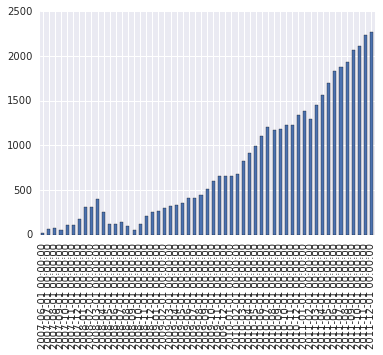

In [31]:

print (lendingclubdf.loan_status.value_counts())

issue_d_todate = pd.to_datetime(lendingclubdf.issue_d)# (df['issue_d'].apply(lambda x: x.strftime('%Y-%m-%d')))
lendingclubdf.issue_d = pd.Series(lendingclubdf.issue_d).str.replace('-2014', '')
# We need sort_index() or else we won't get a sequential timedate order.
issue_d_todate.value_counts().sort_index().plot(kind='bar')

lendingclubdf.drop(['loan_status'],1, inplace=True)


In [33]:
lendingclubdf.ix[:5,12:21]

,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti
0,Dec-2011,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,Dec-2011,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,Dec-2011,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72
3,Dec-2011,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00
4,Dec-2011,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94
5,Dec-2011,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20


In [36]:
print (lendingclubdf.purpose.value_counts())
print ('')
print (lendingclubdf.title.value_counts().tail())

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

Better rate to replace my credit cards    1
LedingClubLoan                            1
oasis                                     1
Funds needed during JD Program            1
Higher Education Employee Needs Help.     1
Name: title, dtype: int64


In [37]:

lendingclubdf.drop(['pymnt_plan','url','desc','title' ],1, inplace=True)

In [39]:
lendingclubdf.ix[:5,17:25]

,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc
0,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0
1,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0
2,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0
3,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0
4,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0
5,0.0,Nov-2004,730.0,734.0,3.0,NaN,NaN,9.0


In [42]:

lendingclubdf.delinq_2yrs.value_counts()


0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [45]:
# from datetime import datetime

# lendingclubdf.earliest_cr_line = pd.to_datetime(lendingclubdf.earliest_cr_line)

# dttoday = datetime.now().strftime('%Y-%m-%d')
# # There is a better way to do this :) 
# lendingclubdf.earliest_cr_line = lendingclubdf.earliest_cr_line.apply(lambda x: (
#         np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365)

# lendingclubdf.earliest_cr_line


ValueError: Could not convert object to NumPy timedelta

In [47]:
lendingclubdf['fico_range'] = lendingclubdf.fico_range_low.astype('str') + '-' + lendingclubdf.fico_range_high.astype('str')
lendingclubdf['meanfico'] = (lendingclubdf.fico_range_low + lendingclubdf.fico_range_high)/2
lendingclubdf.drop(['fico_range_low','fico_range_high','initial_list_status'],1, inplace=True)


In [49]:
lendingclubdf.ix[:5,23:32]


,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,0.0,13648.0,83.7%,9.0,0.0,0.0,5863.155187,5833.84,5000.00
1,0.0,1687.0,9.4%,4.0,0.0,0.0,1014.530000,1014.53,456.46
2,0.0,2956.0,98.5%,10.0,0.0,0.0,3005.666844,3005.67,2400.00
3,0.0,5598.0,21%,37.0,0.0,0.0,12231.890000,12231.89,10000.00
4,0.0,27783.0,53.9%,38.0,0.0,0.0,4066.908161,4066.91,3000.00
5,0.0,7963.0,28.3%,12.0,0.0,0.0,5632.210000,5632.21,5000.00


In [51]:
lendingclubdf.revol_util = pd.Series(lendingclubdf.revol_util).str.replace('%', '').astype(float)


In [53]:
lendingclubdf.ix[:5,23:32]

,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,0.0,13648.0,83.7,9.0,0.0,0.0,5863.155187,5833.84,5000.00
1,0.0,1687.0,9.4,4.0,0.0,0.0,1014.530000,1014.53,456.46
2,0.0,2956.0,98.5,10.0,0.0,0.0,3005.666844,3005.67,2400.00
3,0.0,5598.0,21.0,37.0,0.0,0.0,12231.890000,12231.89,10000.00
4,0.0,27783.0,53.9,38.0,0.0,0.0,4066.908161,4066.91,3000.00
5,0.0,7963.0,28.3,12.0,0.0,0.0,5632.210000,5632.21,5000.00


In [54]:
lendingclubdf.drop(['out_prncp','out_prncp_inv','total_pymnt',
         'total_pymnt_inv','total_rec_prncp', 'grade', 'sub_grade'] ,1, inplace=True)

In [55]:
lendingclubdf.ix[:5,23:32]


,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d
0,83.7,9.0,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN
1,9.4,4.0,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN
2,98.5,10.0,605.67,0.00,0.0,0.00,Jun-2014,649.91,NaN
3,21.0,37.0,2214.92,16.97,0.0,0.00,Jan-2015,357.48,NaN
4,53.9,38.0,1066.91,0.00,0.0,0.00,Jan-2017,67.30,NaN
5,28.3,12.0,632.21,0.00,0.0,0.00,Jan-2015,161.03,NaN


In [56]:
lendingclubdf.drop(['last_pymnt_d','last_pymnt_amnt',
         'next_pymnt_d','last_credit_pull_d'],1, inplace=True)


In [58]:
lendingclubdf.ix[:5,23:32]

,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med
0,83.7,9.0,863.16,0.00,0.0,0.00,754.0,750.0,0.0
1,9.4,4.0,435.17,0.00,122.9,1.11,499.0,0.0,0.0
2,98.5,10.0,605.67,0.00,0.0,0.00,684.0,680.0,0.0
3,21.0,37.0,2214.92,16.97,0.0,0.00,604.0,600.0,0.0
4,53.9,38.0,1066.91,0.00,0.0,0.00,694.0,690.0,0.0
5,28.3,12.0,632.21,0.00,0.0,0.00,564.0,560.0,0.0


In [59]:

lendingclubdf['last_fico_range'] = lendingclubdf.last_fico_range_low.astype('str') + '-' + lendingclubdf.last_fico_range_high.astype('str')
lendingclubdf['last_meanfico'] = (lendingclubdf.last_fico_range_low + lendingclubdf.last_fico_range_high)/2
lendingclubdf.drop(['last_fico_range_high','last_fico_range_low','policy_code'],1, inplace=True)

In [61]:
print (lendingclubdf.columns)
print (lendingclubdf.head(1).values)
lendingclubdf.info()

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 

In [63]:
 lendingclubdf.fillna(0.0,inplace=True)
lendingclubdf.fillna(0,inplace=True)


In [68]:
cor = lendingclubdf.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]
df=lendingclubdf

In [69]:
df.drop(['zip_code','funded_amnt','funded_amnt_inv', 'installment', 'mths_since_last_delinq', 'total_acc'], axis=1, inplace=True)

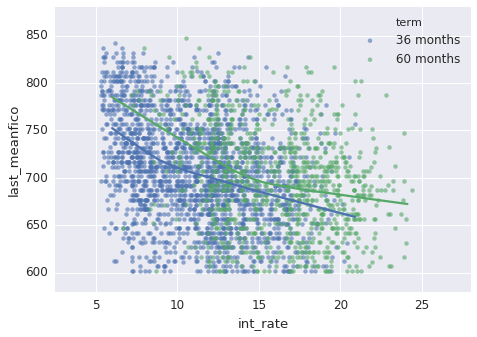

In [70]:
plot_df = df.query('last_meanfico > 600 & int_rate <28')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 



g = sns.lmplot("int_rate", "last_meanfico", x_jitter= .7,  y_jitter= .1,
           data=plot_df, hue='term',lowess=True, size=5,aspect=1.4, legend_out=False,
           scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(2.5, 28),ylim=(580, 880),alpha = .5)

g.savefig('1.png',transparent=True)


In [71]:
y = df.int_rate.values
df.drop('int_rate',axis = 1, inplace=True)


(array([  0.  ,   5.42,   5.79,   5.99,   6.  ,   6.03,   6.17,   6.39,
          6.54,   6.62,   6.76,   6.91,   6.92,   6.99,   7.05,   7.12,
          7.14,   7.29,   7.37,   7.4 ,   7.42,   7.43,   7.49,   7.51,
          7.66,   7.68,   7.74,   7.75,   7.88,   7.9 ,   7.91,   8.  ,
          8.07,   8.32,   8.38,   8.49,   8.59,   8.63,   8.7 ,   8.88,
          8.9 ,   8.94,   9.01,   9.07,   9.2 ,   9.25,   9.32,   9.33,
          9.38,   9.45,   9.51,   9.62,   9.63,   9.64,   9.67,   9.7 ,
          9.76,   9.83,   9.88,   9.91,   9.96,   9.99,  10.  ,  10.01,
         10.08,  10.14,  10.2 ,  10.25,  10.28,  10.33,  10.36,  10.37,
         10.38,  10.39,  10.46,  10.51,  10.59,  10.62,  10.64,  10.65,
         10.71,  10.74,  10.75,  10.78,  10.83,  10.91,  10.95,  10.96,
         10.99,  11.03,  11.09,  11.11,  11.12,  11.14,  11.22,  11.26,
         11.28,  11.34,  11.36,  11.41,  11.46,  11.48,  11.49,  11.54,
         11.58,  11.59,  11.63,  11.66,  11.71,  11.72,  11.78, 

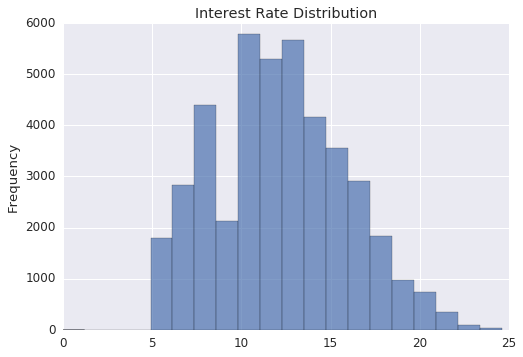

In [72]:
np.unique(y), pd.Series(y).plot(kind='hist',alpha=.7, bins=20, title='Interest Rate Distribution')

In [73]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 333 entries, loan_amnt to last_fico_range_nan-nan
dtypes: datetime64[ns](1), float64(331), int64(1)
memory usage: 108.1 MB


In [74]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


In [82]:
X.astype(float)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [76]:
X, y = shuffle(df.values, y, random_state=30)
#X = X.astype(np.float32)


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
offset = int(X.shape[0] * 0.75)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]